In [1]:
%run ../App/AppTrading.ipynb
%run ../DataHistorica/DataHistorica.ipynb
%run ../GeneradorOrdenes/GeneradorContratos.ipynb
%run ../IndicadoresTecnicos/IndicadoresTecnicos.ipynb
%run ../Backtesting/Backtesting.ipynb

In [3]:
import pytz
import pandas as pd

# Descargar Data para el Analisis

In [6]:
def websocket_con():
    app.run()
    
app = TradeApp()      
app.connect("127.0.0.1", 7496, clientId=1)

# starting a separate daemon thread to execute the websocket connection
con_thread = threading.Thread(target=websocket_con, daemon=True)
con_thread.start()
time.sleep(1)

tickers = ["META","AMZN","INTC","MSFT","AAPL","GOOG","CSCO","CMCSA","ADBE","NVDA","NFLX",
          "PYPL","AMGN","AVGO","TXN","CHTR","QCOM","GILD","FI","BKNG",
          "INTU","ADP","CME","TMUS","MU"]

for ticker in tickers:
    try:
        descargar_data_historica(app,tickers.index(ticker),generar_contrato(ticker),'1 Y', '15 mins')
        time.sleep(5)
    except Exception as e:
        print(e)
        print("unable to extract data for {}".format(ticker))

NextValidId: 1
Error -1 2104 Market data farm connection is OK:usfarm.nj
Error -1 2104 Market data farm connection is OK:usfuture
Error -1 2104 Market data farm connection is OK:cashfarm
Error -1 2104 Market data farm connection is OK:usfarm
Error -1 2106 HMDS data farm connection is OK:ushmds
Error -1 2158 Sec-def data farm connection is OK:secdefnj


In [7]:
len(list(app.data.keys()))

4

In [40]:
len(list(app.data.keys()))

25

In [42]:
dataHistorica = convertir_data_historica_extraida(tickers,app)

In [72]:
dataHistoricaSeleccionada = {key: dataHistorica[key] for key in ["META","AMZN","INTC","MSFT","AAPL","GOOG","CSCO","CMCSA","ADBE","NVDA"]}

# Backtest Ultimo ano

In [75]:
ohlc_dict,tickers_ret,trade_count,trade_data = backtest_macd_stoch(dataHistoricaSeleccionada)

Calculating MACD & Stochastics for  META
Calculating MACD & Stochastics for  AMZN
Calculating MACD & Stochastics for  INTC
Calculating MACD & Stochastics for  MSFT
Calculating MACD & Stochastics for  AAPL
Calculando retornos diarios para:  META
Calculando retornos diarios para:  AMZN
Calculando retornos diarios para:  INTC
Calculando retornos diarios para:  MSFT
Calculando retornos diarios para:  AAPL


# KPIs de la Estrategia

In [77]:
# Calcular los KPI de la Estrategia
retornos_estrategia = pd.DataFrame()
for ticker in list(dataHistoricaSeleccionada.keys()):
    retornos_estrategia[ticker] = ohlc_dict[ticker]["ret"]
retornos_estrategia["ret"] = retornos_estrategia.mean(axis=1)
# creating dataframe with daily returns
retornos_estrategia.index = pd.Index([pd.to_datetime(date_str.rsplit(' ', 1)[0], format='%Y%m%d %H:%M:%S').tz_localize(pytz.timezone(date_str.rsplit(' ', 1)[1]))for date_str in retornos_estrategia.index])
retornos_estrategia.index = pd.to_datetime(retornos_estrategia.index)
retornos_estrategia.index = retornos_estrategia.index.tz_convert('America/Indiana/Petersburg')    
retornos_diarios = retornos_estrategia["ret"].resample("D").sum(min_count=1).dropna()

<Axes: >

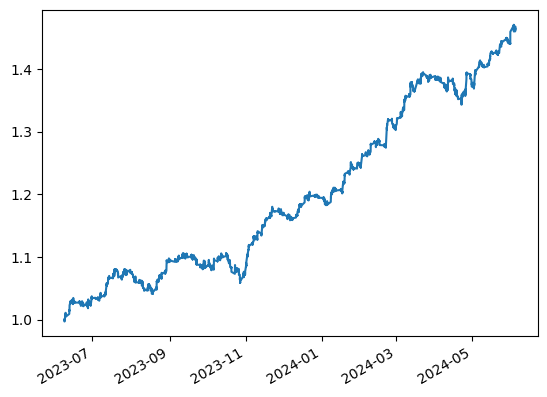

In [79]:
(1 + retornos_estrategia['ret']).cumprod().plot()

In [91]:
retornos_diarios

2023-06-08 00:00:00-04:00   -0.001218
2023-06-09 00:00:00-04:00    0.006090
2023-06-12 00:00:00-04:00    0.017943
2023-06-13 00:00:00-04:00    0.004601
2023-06-14 00:00:00-04:00   -0.001002
                               ...   
2024-05-29 00:00:00-04:00   -0.005271
2024-05-30 00:00:00-04:00   -0.000732
2024-05-31 00:00:00-04:00    0.012641
2024-06-03 00:00:00-04:00    0.003611
2024-06-04 00:00:00-04:00   -0.000333
Name: ret, Length: 249, dtype: float64

In [89]:
retornos_estrategia.head(50)

,META,AMZN,INTC,MSFT,AAPL,GOOG,CSCO,CMCSA,ADBE,NVDA,ret
2023-06-08 11:30:00-04:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-08 11:45:00-04:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-08 12:00:00-04:00,-0.000225,0.000000,0.000000,0.000000,0.000167,0.000243,0.000000,0.000000,0.000000,0.000000,0.000018
2023-06-08 12:15:00-04:00,0.004354,0.000000,0.000000,0.000000,0.002339,0.000081,0.000000,0.000000,0.000000,0.000000,0.000677
2023-06-08 12:30:00-04:00,-0.002429,-0.003282,0.000000,-0.003271,-0.001612,-0.002508,0.000000,0.000000,-0.002180,0.000000,-0.001528
2023-06-08 12:45:00-04:00,0.000899,0.000080,0.000000,0.000000,-0.000334,-0.001785,0.000000,0.000247,-0.001934,0.000000,-0.000283
2023-06-08 13:00:00-04:00,0.000599,0.001526,0.004774,0.000000,0.000835,0.000813,0.000000,-0.001735,-0.000935,0.000000,0.000588
2023-06-08 13:15:00-04:00,-0.004750,-0.004089,0.006021,0.000000,-0.001669,-0.003248,0.000000,0.000745,-0.002944,0.000000,-0.000993
2023-06-08 13:30:00-04:00,0.000000,-0.001852,-0.002836,0.000000,-0.001950,-0.002607,0.000000,0.000745,-0.003159,0.000000,-0.001166
2023-06-08 13:45:00-04:00,0.000000,-0.001775,-0.004651,0.000000,0.002289,0.001388,0.000000,0.000742,-0.000896,0.000000,-0.000290
